In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import os
os.environ["CURL_CA_BUNDLE"] = "/etc/ssl/certs/ca-certificates.crt" # A workaround in case this happens: https://github.com/mapbox/rasterio/issues/1289

import numpy as np
import rasterio

import utils
import viz_utils

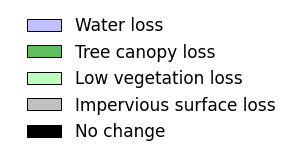

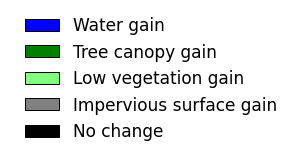

In [2]:
viz_utils.show_loss_legend()
viz_utils.show_gain_legend()

In [3]:
## Load the independent predictions for both years
with rasterio.open("https://dfc2021.blob.core.windows.net/competition-data/naip-2013/1950_naip-2013.tif") as f:
    naip = np.rollaxis(f.read(), 0, 3)

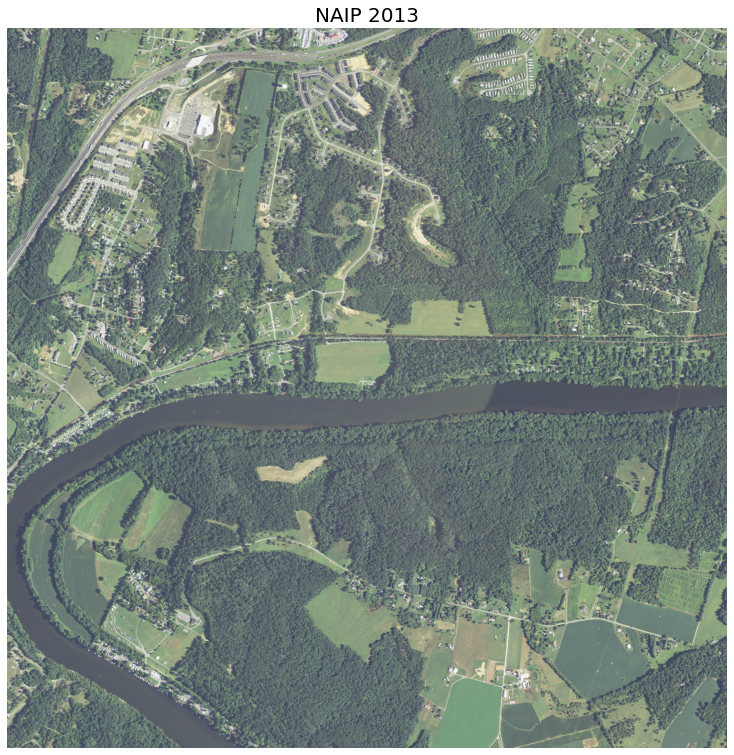

In [4]:
viz_utils.show_img(naip[:,:,:3], None, None, None, title="NAIP 2013")

In [5]:
## Load the independent predictions for both years
with rasterio.open("../results/nlcd_only_baseline/output/1950_predictions-2013.tif") as f:
    t1 = f.read(1)
    input_profile = f.profile.copy() # save the metadata for writing output
    
with rasterio.open("../results/nlcd_only_baseline/output/1950_predictions-2017.tif") as f:
    t2 = f.read(1)

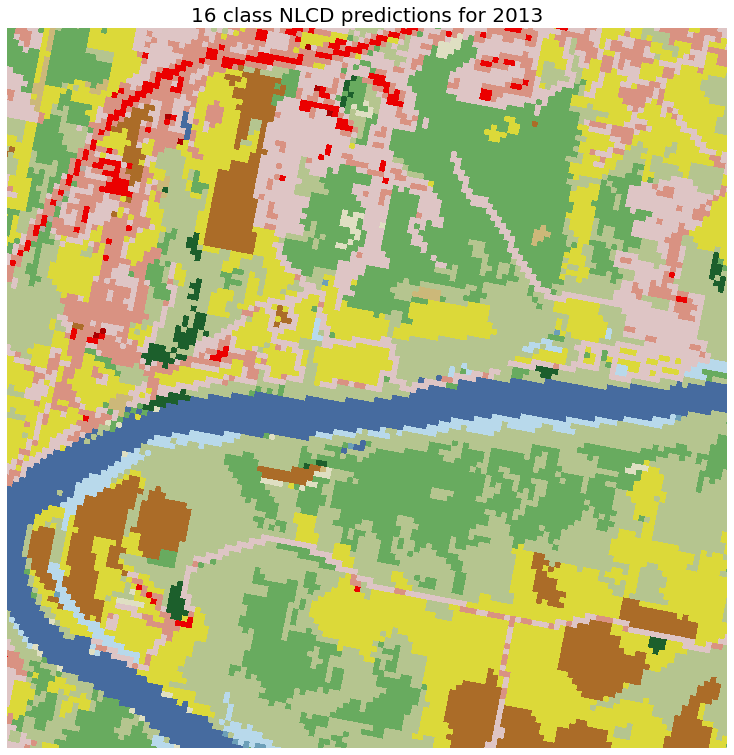

In [6]:
viz_utils.show_img(t1, viz_utils.CMAP_NLCD, 0, 16, title="16 class NLCD predictions for 2013")

In [7]:
t1_reduced = utils.NLCD_IDX_TO_REDUCED_LC_MAP[t1]
t2_reduced = utils.NLCD_IDX_TO_REDUCED_LC_MAP[t2]

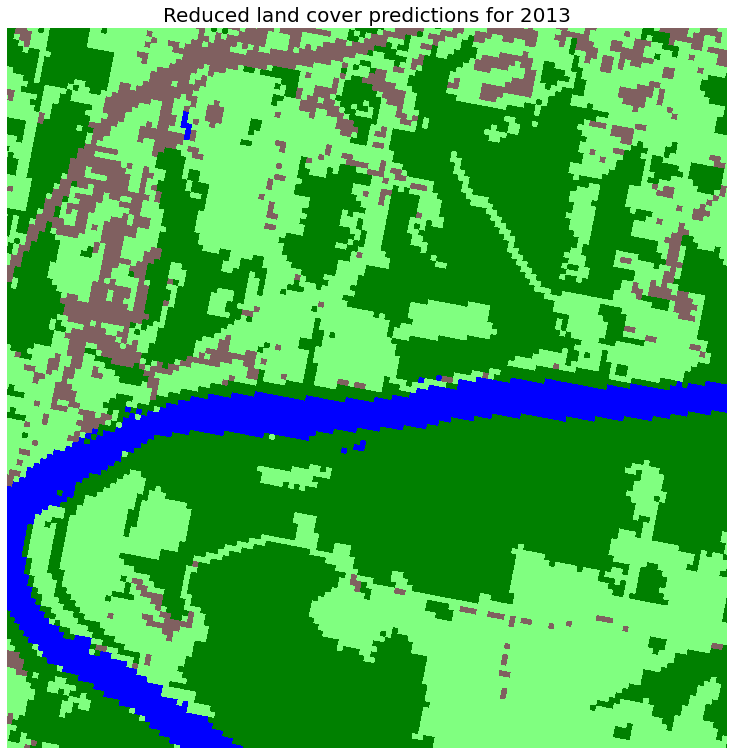

In [8]:
viz_utils.show_img(t1_reduced, viz_utils.CMAP_LC, 0, 4, title="Reduced land cover predictions for 2013")

In [9]:
# Convert the two layers of predictions into the format expected by codalab
predictions = (t1_reduced * 4) + t2_reduced
predictions[predictions==5] = 0
predictions[predictions==10] = 0
predictions[predictions==15] = 0
predictions = predictions.astype(np.uint8)

with rasterio.open("1950_predictions.tif", "w", **input_profile) as f:
    f.write(predictions, 1)

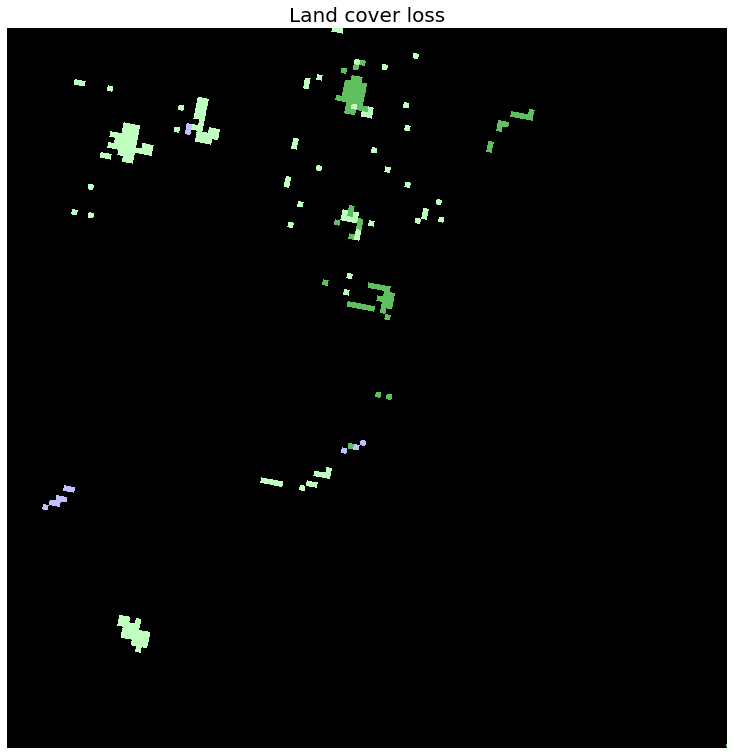

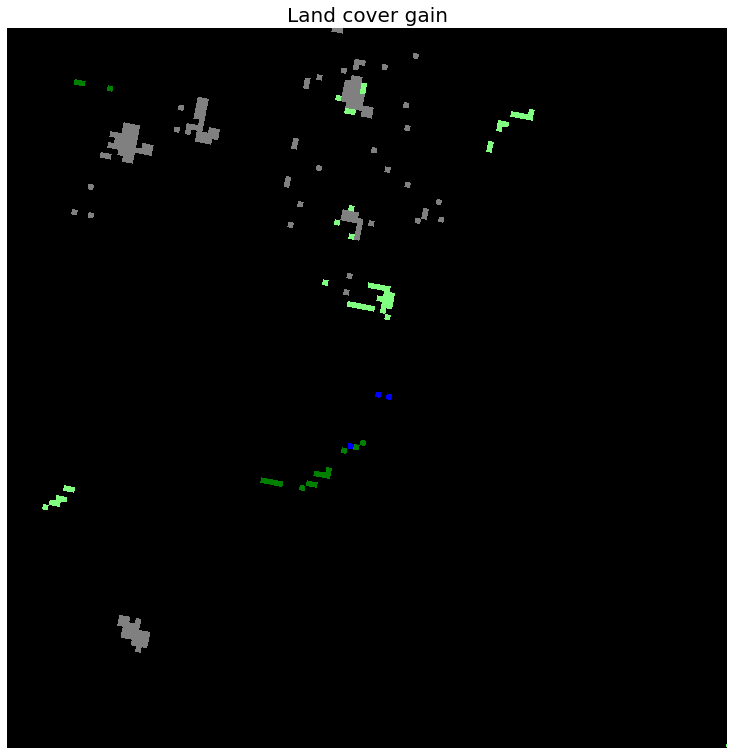

In [10]:
viz_utils.show_loss(predictions, title="Land cover loss")
viz_utils.show_gain(predictions, title="Land cover gain")